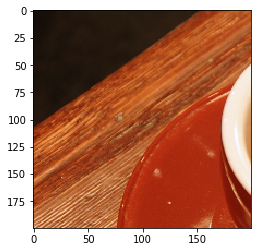

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint

image = data.coffee()[0:200, 0:200]
#Taking some part of the image

plt.imshow(image)
plt.show()

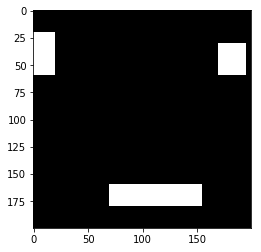

(200, 200, 3)


In [3]:
# Create mask with three defect regions: left, middle, right respectively
mask = np.zeros(image.shape[:-1])
#Rectangular white patches
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1

plt.imshow(mask, cmap='gray')
plt.show()
#print(image.shape)

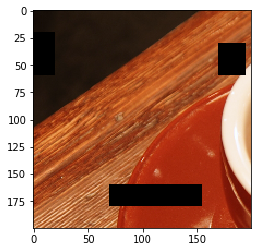

In [6]:
# Mask the defective image over original image
# Defect image over the same region in each color channel
# copy original image into variable defect
defect = image.copy()
#plt.imshow(defect)
#plt.show()

#Applying the mask,masking the white regions in defect to black color
for layer in range(defect.shape[-1]):
    defect[np.where(mask)] = 0

plt.imshow(defect)
plt.show()

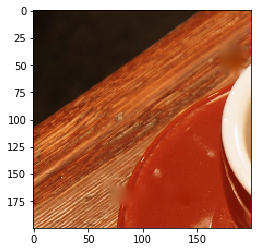

In [7]:
#Restoration of image by biharmonic inpainting
result = inpaint.inpaint_biharmonic(defect, mask, multichannel=True)
plt.imshow(result)
plt.show()
# All pixels with defect have been repaired / blurred